<h1>CS198-82 Data Analysis</h1>

In [492]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for linear regression
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [489]:
# import World Development Index Data 
df = pd.read_csv('WDI_csv/WDIData.csv')
# explain the multiple CSV files in the download and what information they give about the main data

In [275]:
# print dataframe head 
df.head()


,"﻿""Country Name""",Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [276]:
# isolate columns of interest (refer to writeup) and drop rows with no values 
# note running dropna first will delete all rows as every row has at least one column with no value
# note shape for writeup 
# screenshot head print 
df.shape

(408936, 62)

In [277]:
def find_rows(df,col,rows):
    """Return a dataframe where the rows of the given column value match the rows passed as an arguement"""
    return_data = df[df[col].isin(rows)]
    return return_data


In [278]:
# theme of paper is CO2 emission and national productivity 
# first we plot a histogram of countries levels of gov expd on education and GDP growth in 2014 (last data available for CO2)

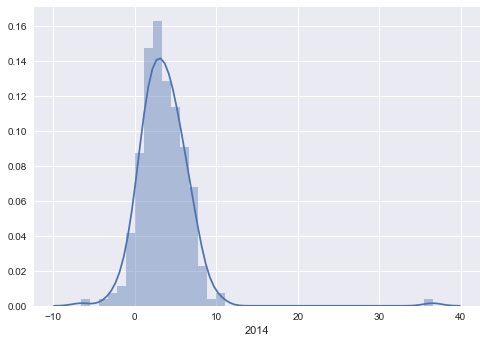

In [279]:
# plot GDP GROWTH Data 
GDP_growth_data = find_rows(df,'Indicator Code',['NY.GDP.MKTP.KD.ZG'])

GDP_growth_data_2014 = GDP_growth_data['2014'].dropna()
sns.distplot(GDP_growth_data_2014)
plt.show()


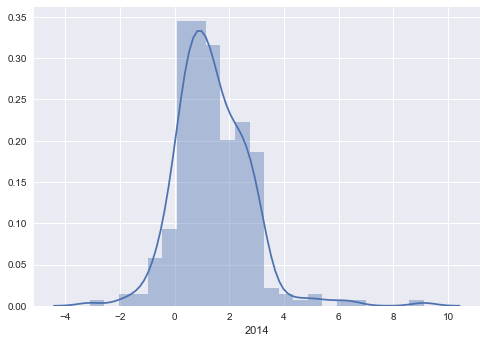

In [400]:
# plot on government expediture on education (total % of gov expediture)
#gov_exp_edu_data = find_rows(df,'Indicator Code',['SE.XPD.TOTL.GB.ZS'])

#gov_exp_edu_data_2014 = gov_exp_edu_data['2014'].dropna()
#sns.distplot(gov_exp_edu_data_2014)


#SP.POP.GROW
population_growth = find_rows(df,'Indicator Code',['SP.POP.GROW'])
population_growth_2014 = population_growth['2014'].dropna()
sns.distplot(population_growth_2014)
plt.show()



In [423]:
GDP_growth_data_2014 = GDP_growth_data[['Country Code','2014']]
population_growth_2014 = population_growth[['Country Code', '2014']]
# removed outliers (beyond 3s.ds from mean)
GDP_growth_data_2014 = GDP_growth_data_2014[np.abs(GDP_growth_data_2014['2014']-GDP_growth_data_2014['2014'].mean())<=(3*GDP_growth_data_2014['2014'].std())]
population_growth_2014 = population_growth_2014[np.abs(population_growth_2014['2014']-population_growth_2014['2014'].mean())<=(3*population_growth_2014['2014'].std())]

In [438]:
# make a data frame of population growth and GDP growth, dropping NaN columns after pairing the data on each country above 
#df = pd.DataFrame({'gov expediture':gov_exp_edu_data['2014'],'GDP Growth Rate':GDP_growth_data['2014']})
# merge tables for GDP growth and Gov exp on Country Code - join does not work
joined_table = pd.merge(population_growth_2014,GDP_growth_data_2014, on='Country Code')
scatter_table = joined_table.dropna()
# relabel columns for graph below
scatter_table.columns = ['Country Code', 'Population Growth Rate','GDP Growth Rate']
scatter_table.head()

,Country Code,Population Growth Rate,GDP Growth Rate
0,ARB,2.185197,2.911346
1,CSS,0.615138,0.459585
2,CEB,-0.209757,2.934447
3,EAR,1.433947,4.473000
4,EAS,0.681871,4.112854


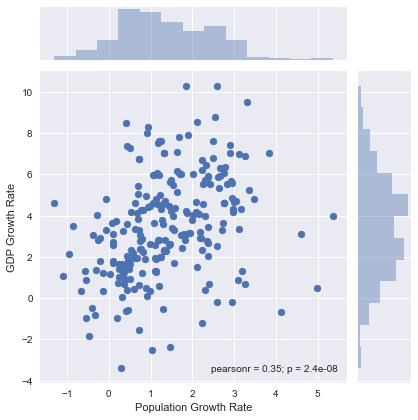

In [425]:
sns.jointplot(x='Population Growth Rate',y='GDP Growth Rate',data=scatter_table)
plt.show()

In [427]:
# time series data to show change in GDP growth rate and gov exp on education as a percentage of GDP
US_GDP_TS = find_rows(GDP_growth_data,'Country Code',['USA'])
US_pop_TS = find_rows(population_growth,'Country Code',['USA'])
US_GDP_TS_Clean = US_GDP_TS.drop(['Indicator Code',US_GDP_TS.columns[0],'Indicator Name'],axis=1)
US_pop_TS_clean = US_pop_TS.drop(['Indicator Code',US_pop_TS.columns[0],'Indicator Name'],axis=1)

In [428]:
# merge US governement expediture and GDP growth on the country code USA
USA_ts = pd.concat([US_GDP_TS_Clean,US_pop_TS_clean])
USA_ts

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
392411,USA,NaN,2.30000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,-0.291621,-2.775530,2.531921,1.601455,2.224031,1.677332,2.370458,2.596148,1.615656,NaN
392999,USA,1.701993,1.65773,1.537997,1.439165,1.389046,1.250172,1.154893,1.088881,0.998461,...,0.945865,0.876651,0.836422,0.745614,0.746420,0.700262,0.743124,0.729732,0.692801,NaN


In [429]:
USA_ts = USA_ts.drop(['Country Code'],axis=1)
USA_ts

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
392411,NaN,2.30000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,-0.291621,-2.775530,2.531921,1.601455,2.224031,1.677332,2.370458,2.596148,1.615656,NaN
392999,1.701993,1.65773,1.537997,1.439165,1.389046,1.250172,1.154893,1.088881,0.998461,0.977243,...,0.945865,0.876651,0.836422,0.745614,0.746420,0.700262,0.743124,0.729732,0.692801,NaN


In [430]:
USA_ts = USA_ts.transpose()

In [431]:
USA_ts.columns = ['GDP Growth Rate','Population Growth Rate']

In [439]:
USA_ts.head()

,GDP Growth Rate,Population Growth Rate
1961,2.3,1.657730
1962,6.1,1.537997
1963,4.4,1.439165
1964,5.8,1.389046
1965,6.4,1.250172


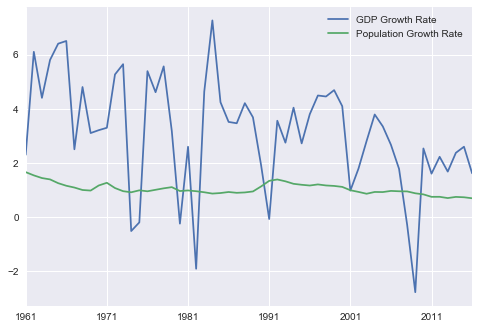

In [435]:
#sns.tsplot(data=USA_ts,time=time_vals)
USA_ts = USA_ts.dropna()
USA_ts.plot()
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [465]:
# realised US has been developed - used a lower income country 
# time series data to show change in GDP growth rate and gov exp on education as a percentage of GDP
GHA_GDP_TS = find_rows(GDP_growth_data,'Country Code',['GHA'])
GHA_pop_TS = find_rows(population_growth,'Country Code',['GHA'])
GHA_GDP_TS_Clean = GHA_GDP_TS.drop(['Indicator Code',GHA_GDP_TS.columns[0],'Indicator Name'],axis=1)
GHA_pop_TS_clean = GHA_pop_TS.drop(['Indicator Code',GHA_pop_TS.columns[0],'Indicator Name'],axis=1)

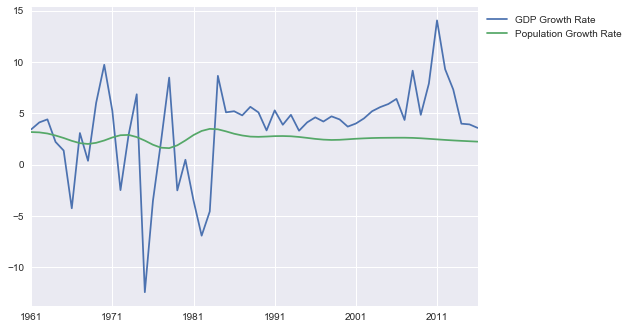

In [467]:
GHA_ts = pd.concat([GHA_GDP_TS_Clean,GHA_pop_TS_clean])
GHA_ts = GHA_ts.drop(['Country Code'],axis=1)
GHA_ts = GHA_ts.transpose()
GHA_ts.columns = ['GDP Growth Rate','Population Growth Rate']
GHA_ts = GHA_ts.dropna()
GHA_ts.plot()
plt.legend(bbox_to_anchor=(1,1))
plt.show()

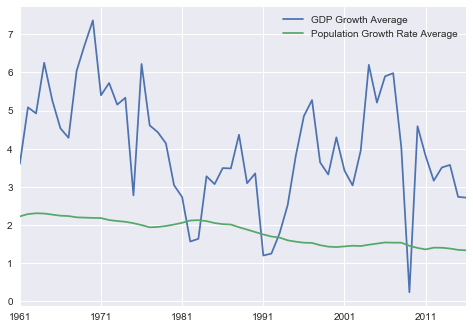

In [482]:
# next step - regression of everything on GDP Growth Rate 
# write up 
avg_pop_growth = population_growth.mean(axis=0)
avg_GDP_growth = GDP_growth_data.mean(axis=0)

avg_dict  = {'Population Growth Rate Average': avg_pop_growth, 'GDP Growth Average':avg_GDP_growth}
avg_table = pd.DataFrame(data=avg_dict).dropna()
avg_table.plot()
plt.show()

In [485]:
# regression 
# we have average pop growth rate and gdp growth rate for all countries in data set from 1960 to 2016
# scatter table has the y and x variables we wish to use for our linear regression 
scatter_table.head()

,Country Code,Population Growth Rate,GDP Growth Rate
0,ARB,2.185197,2.911346
1,CSS,0.615138,0.459585
2,CEB,-0.209757,2.934447
3,EAR,1.433947,4.473000
4,EAS,0.681871,4.112854


In [507]:
# split data into training and validation set
# split 20% validation 80% training - no need to sort because alphabetically randomised 
training_index = int(round(len(population_growth_2014)*0.8))

In [520]:
# create training and validation sets 
GDP_growth_train = scatter_table['GDP Growth Rate'][0:training_index]
pop_growth_train = scatter_table['Population Growth Rate'][0:training_index]
GDP_growth_valid = scatter_table['GDP Growth Rate'][training_index:]
pop_growth_valid = scatter_table['Population Growth Rate'][training_index:]


In [539]:
myOLS = sm.OLS(pop_growth_train,GDP_growth_train).fit()
pop_hat = myOLS.predict(GDP_growth_valid)
mse = np.dot((pop_growth_valid-pop_hat),(pop_growth_valid-pop_hat)) / len(pop_growth_valid)
print("The Mean Squared Error for the model is:",mse)

('The Mean Squared Error for the model is:', 1.233731643019389)


In [552]:
#myOLS.score(GDP_growth_train,pop_growth_train)
myOLS.rsquared()

TypeError: 'numpy.float64' object is not callable

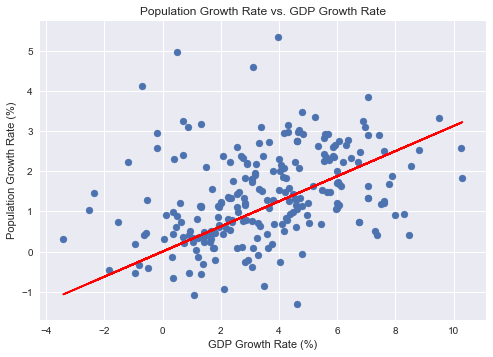

In [524]:
pop_reg = scatter_table['Population Growth Rate']
GDP_reg = scatter_table['GDP Growth Rate']
myOLSpop = sm.OLS(pop_reg,GDP_reg).fit()
plt.plot(GDP_reg,myOLS.predict(GDP_reg),color='red')
plt.scatter(GDP_reg,pop_reg)
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Population Growth Rate (%)')
plt.title('Population Growth Rate vs. GDP Growth Rate')
plt.show()